In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from PIL import Image

In [2]:
# Mutiple data example 2020-02-28-13-15-36 :100
# best example : 2019-09-16-12-52-12
loc = r"C:\Users\Sidharth\Documents\code\HAPD\datasets\Carrada\2020-02-28-12-12-16"
cam = r"camera_images"
ra = r"range_angle_numpy"
rd = r"range_doppler_numpy"
ad = "angle_doppler_processed"

In [3]:
num = 58
frame = "".join(["0" for _ in range(6-len(str(num)))])+str(num)

In [4]:
delay = 1
frame_prev = "".join(["0" for _ in range(6-len(str(num-delay)))])+str(num-delay)

In [5]:
camera = Image.open(os.path.join(loc,os.path.join(cam,frame+".jpg")))
radar = np.load(os.path.join(loc,os.path.join(ra,frame+".npy")))
doppler = np.rot90(np.rot90(np.array(np.load(os.path.join(loc,os.path.join(rd,frame+".npy"))))))
angle = np.rot90(np.rot90(np.array(np.load(os.path.join(loc,os.path.join(ad,frame+".npy"))))))

In [6]:
radar_prev = np.load(os.path.join(loc,os.path.join(ra,frame_prev+".npy")))
doppler_prev = np.rot90(np.rot90(np.array(np.load(os.path.join(loc,os.path.join(rd,frame_prev+".npy"))))))
angle_prev = np.rot90(np.rot90(np.array(np.load(os.path.join(loc,os.path.join(ad,frame_prev+".npy"))))))

In [7]:
fft_rd = np.dot(radar,doppler)
angle = np.transpose(angle)
fft_ra = np.dot(doppler,angle)
fft_fft_rf = np.dot(radar,fft_ra)
fft_fft_rd = np.dot(fft_ra,doppler)

In [8]:
fft_rd_prev = np.dot(radar_prev,doppler_prev)
angle_prev = np.transpose(angle_prev)
fft_ra_prev = np.dot(doppler_prev,angle_prev)
fft_fft_rf_prev = np.dot(radar_prev,fft_ra_prev)
fft_fft_rd_prev = np.dot(fft_ra_prev,doppler_prev)

In [9]:
avg_ra = fft_ra.mean(axis = 1)
avg_rd = fft_fft_rd.mean(axis=1)
avg_ra_prev =fft_ra_prev.mean(axis = 1)
avg_rd_prev = fft_fft_rd_prev.mean(axis=1)

In [10]:
cor = np.convolve(avg_ra,avg_ra_prev)

In [11]:
print((256-np.unravel_index(np.argmax(fft_fft_rd), fft_fft_rd.shape)[0])*50/256)

6.640625


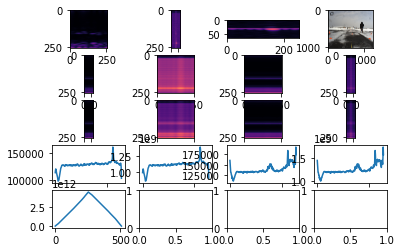

In [12]:
fg,ax = plt.subplots(5,4)
ax[0,0].imshow(radar,cmap="magma")
ax[0,1].imshow(doppler,cmap="magma")
ax[0,2].imshow(angle,cmap = "magma")
ax[0,3].imshow(camera)
ax[1,0].imshow(fft_rd,cmap="magma")
ax[1,1].imshow(fft_ra,cmap="magma")
ax[1,2].imshow(fft_fft_rf,cmap="magma")
ax[1,3].imshow(fft_fft_rd,cmap="magma")
ax[2,0].imshow(fft_rd_prev,cmap="magma")
ax[2,1].imshow(fft_ra_prev,cmap="magma")
ax[2,2].imshow(fft_fft_rf_prev,cmap="magma")
ax[2,3].imshow(fft_fft_rd_prev,cmap="magma")
ax[3,0].plot(avg_ra)
ax[3,1].plot(avg_rd)
ax[3,2].plot(avg_ra_prev)
ax[3,3].plot(avg_rd_prev)
ax[4,0].plot(cor)
plt.show()

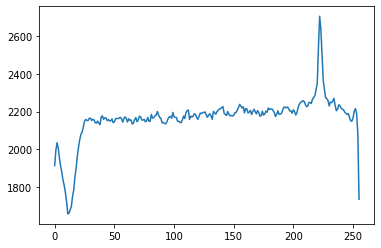

In [19]:
plt.plot(np.sum(doppler,axis = 1))

17823949328.55787
28990068576.504375
223


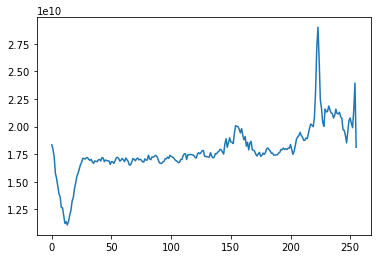

In [14]:
prod = np.prod([avg_ra,avg_ra_prev],axis = 0)
def test(prod):
    plt.plot(prod)
    print(np.mean(prod))
    print(np.max(prod))
    print(np.unravel_index(np.argmax(prod), prod.shape)[0])
test(prod)

0


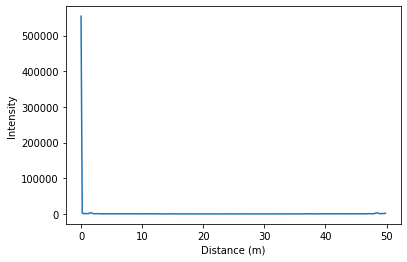

In [15]:
fft_doppler = np.fft.fft(np.fft.fft(doppler,axis=0),axis=1).max(axis = 1).real
def plot(fft_doppler):
    plt.plot(fft_doppler)
    plt.xticks(np.linspace(0,256,6),[0,10,20,30,40,50]) 
    plt.xlabel("Distance (m)")
    plt.ylabel("Intensity") 
    print(np.unravel_index(np.argmax(fft_doppler), fft_doppler.shape)[0])
plot(fft_doppler)

254


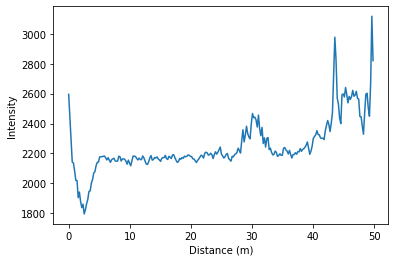

In [16]:
fft_doppler_prev = np.fft.fft(doppler_prev).max(axis = 1).real
plot(fft_doppler_prev)

In [17]:
threshold = np.max(np.abs(fft_doppler)) * 0.95
peak_indices = np.argwhere(np.abs(fft_doppler) > threshold)
print(peak_indices)


[[0]]


In [18]:
original_list = peak_indices
new_list = []

for i in range(len(original_list)-1):
    if original_list[i] != original_list[i+1] - 1:
        new_list.append(original_list[i])

# Append the last element if it is not adjacent to the previous element
if len(original_list) > 0 and original_list[-1] != new_list[-1] + 1:
    new_list.append(original_list[-1])

print(new_list)

IndexError: list index out of range

In [ ]:
fft_ra = np.fft.fft().max(axis = 1)
plt.plot(fft_ra)

TypeError: _fft_dispatcher() missing 1 required positional argument: 'a'

C:\Users\Sidharth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


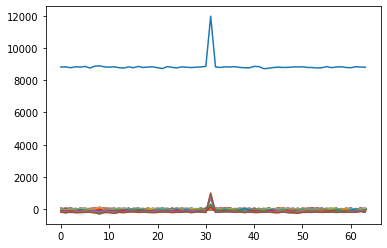

In [ ]:
plt.plot(np.fft.fft(np.transpose(doppler)))

C:\Users\Sidharth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


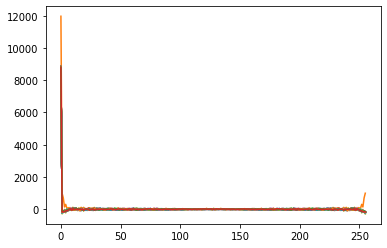

In [ ]:
fft_each = np.fft.fft(radar)
plt.plot(fft_each)

(220, 256)


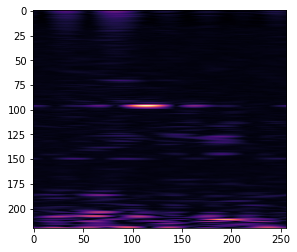

In [ ]:
rad = radar[5:225,]
plt.imshow(rad,cmap="magma")
print(rad.shape)

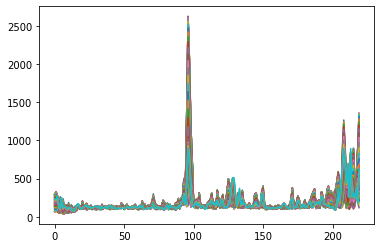

C:\Users\Sidharth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


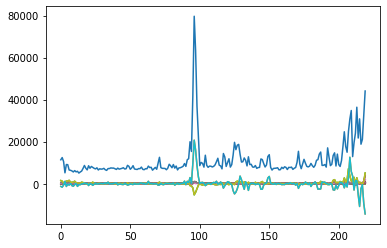

[[ 248.50587   221.19368 ]
 [ 222.09637   200.12427 ]
 [ 103.11845    78.63851 ]
 [ 192.48082   178.63683 ]
 [ 261.15372   241.27405 ]
 [ 174.60811   156.41751 ]
 [ 234.79427   212.94547 ]
 [ 155.05356   143.16557 ]
 [ 116.34026   100.19168 ]
 [ 115.082504  100.35944 ]
 [ 184.87228   169.47487 ]
 [ 139.7402    126.99368 ]
 [  74.88842    67.39554 ]
 [  79.34437    78.738785]
 [ 125.88883   113.09117 ]
 [ 143.4332    132.50906 ]
 [ 120.326385  121.58002 ]
 [ 159.40169   161.03645 ]
 [ 120.99688   111.98662 ]
 [ 113.9027    113.80048 ]
 [ 118.168945  119.028786]
 [ 139.6119    139.21846 ]
 [ 120.12635   122.28696 ]
 [ 122.16702   121.06984 ]
 [ 118.304375  120.35211 ]
 [ 124.27229   124.372604]
 [ 112.488014  113.083145]
 [ 122.51173   119.14622 ]
 [ 121.49075   122.59039 ]
 [  97.40929    94.95599 ]
 [ 106.238625  103.31572 ]
 [ 120.725426  118.5465  ]
 [ 119.95402   116.94069 ]
 [  95.83745    94.88581 ]
 [ 164.06444   162.17668 ]
 [ 130.75839   130.9306  ]
 [ 138.07185   137.03928 ]
 

In [ ]:
val = 60
start = 110
plt.plot(rad[:,start:start + val])
plt.show()
plt.plot(np.fft.fft(rad[:,start:start + val]))
plt.show()
print(rad[:,110:112])

[[ 248.50587463]
 [ 222.09637451]
 [ 103.11844635]
 [ 192.4808197 ]
 [ 261.15371704]
 [ 174.60810852]
 [ 234.79426575]
 [ 155.05355835]
 [ 116.34026337]
 [ 115.08250427]
 [ 184.87228394]
 [ 139.74020386]
 [  74.8884201 ]
 [  79.34436798]
 [ 125.88883209]
 [ 143.43319702]
 [ 120.3263855 ]
 [ 159.40168762]
 [ 120.99687958]
 [ 113.90270233]
 [ 118.16894531]
 [ 139.6118927 ]
 [ 120.1263504 ]
 [ 122.16702271]
 [ 118.30437469]
 [ 124.27229309]
 [ 112.48801422]
 [ 122.51172638]
 [ 121.49075317]
 [  97.4092865 ]
 [ 106.23862457]
 [ 120.72542572]
 [ 119.95401764]
 [  95.83744812]
 [ 164.06443787]
 [ 130.75839233]
 [ 138.07185364]
 [ 116.62704468]
 [ 134.93955994]
 [ 109.19458008]
 [ 121.9551239 ]
 [ 103.45101166]
 [ 127.47733307]
 [ 112.77206421]
 [ 119.20152283]
 [ 137.04402161]
 [ 115.41977692]
 [ 116.84562683]
 [ 152.18414307]
 [ 121.37594604]
 [ 134.24238586]
 [ 128.46591187]
 [ 137.7046051 ]
 [ 133.79486084]
 [ 112.42408752]
 [ 102.27399445]
 [ 105.29507446]
 [ 146.92767334]
 [ 164.7611389

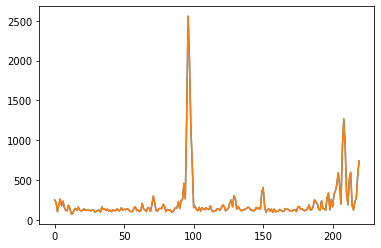

In [ ]:
# ang = np.fft.fft(rad[:,110:112]).real
ang = np.fft.fft(rad[:,110:111]).real
print(ang)
plt.plot(ang)
print(ang.shape)
print(ang[96])

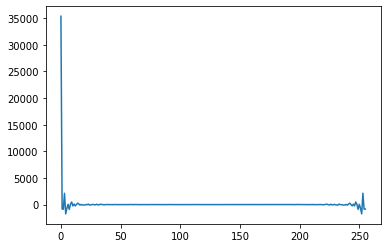

In [ ]:
an = np.fft.fft(rad[110]).real
plt.plot(an)

In [ ]:
a = [[1,2,3,4],[5,6,7,8]]
print(np.fft.fft(a))
print(np.fft.fft(a[0]))

[[10.+0.j -2.+2.j -2.+0.j -2.-2.j]
 [26.+0.j -2.+2.j -2.+0.j -2.-2.j]]
[10.+0.j -2.+2.j -2.+0.j -2.-2.j]


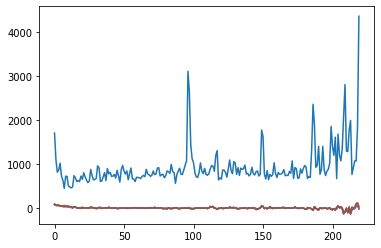

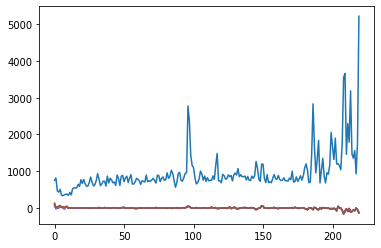

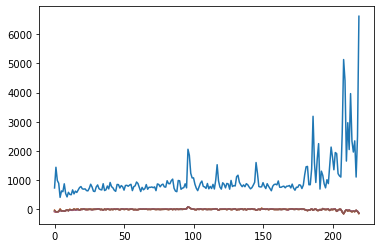

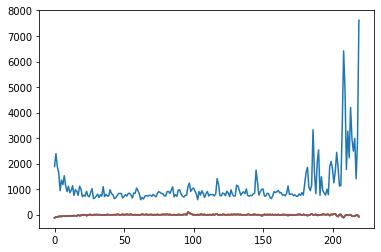

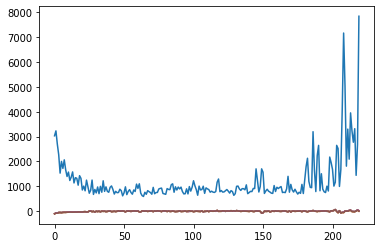

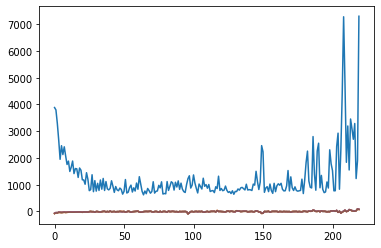

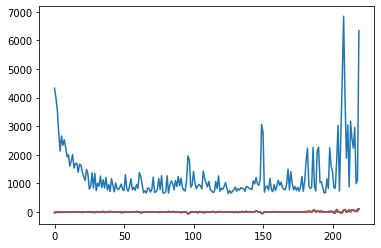

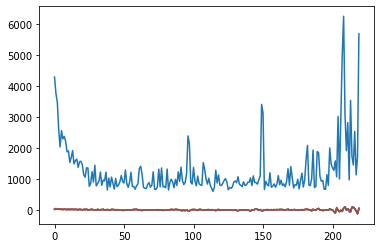

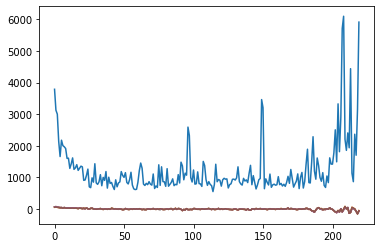

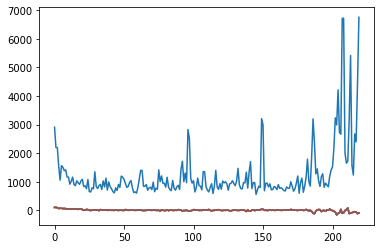

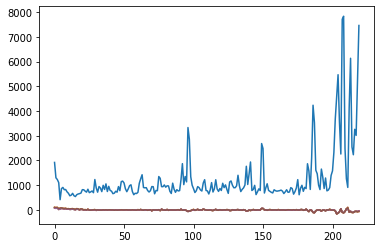

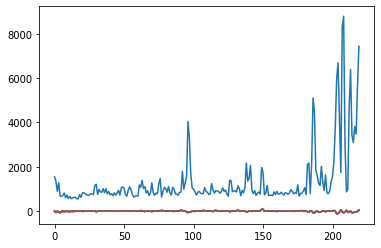

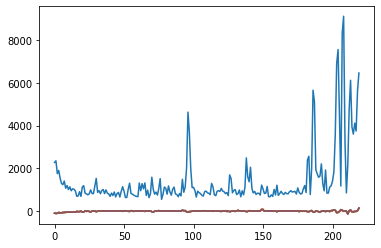

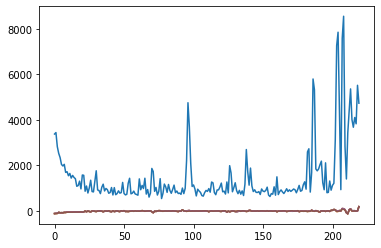

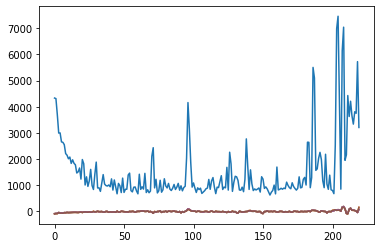

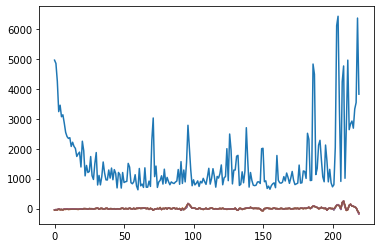

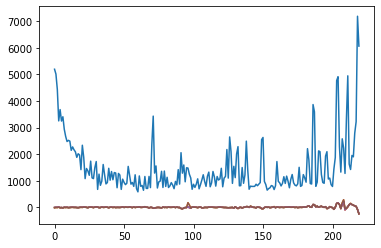

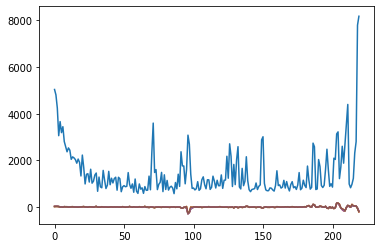

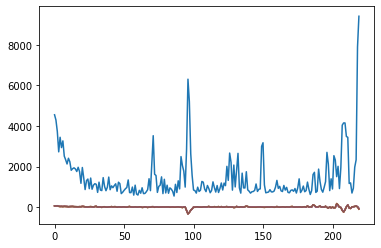

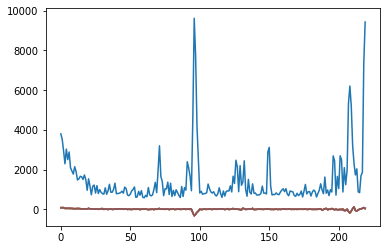

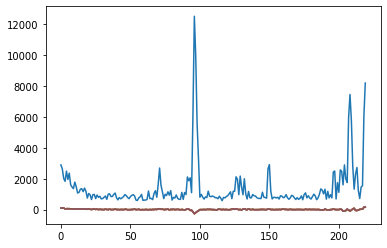

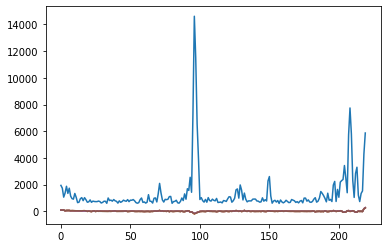

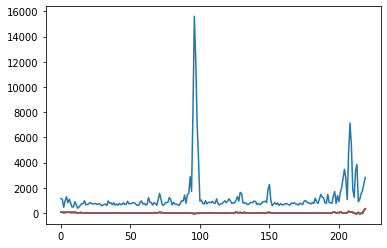

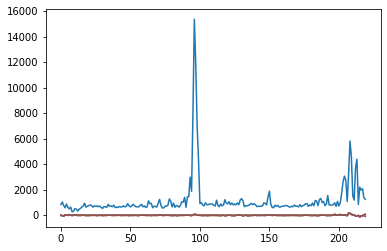

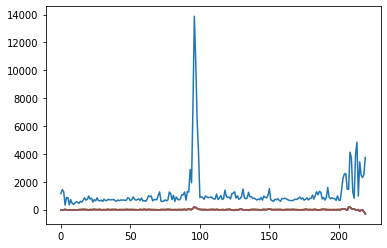

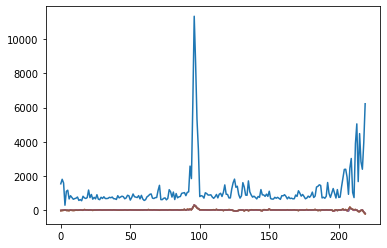

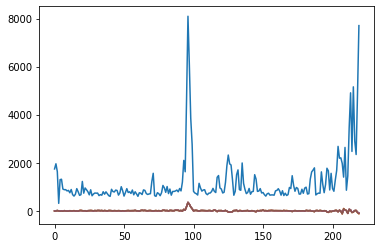

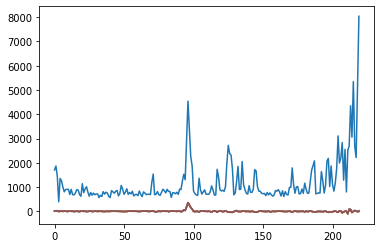

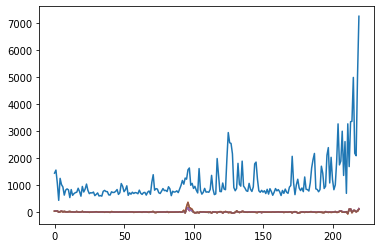

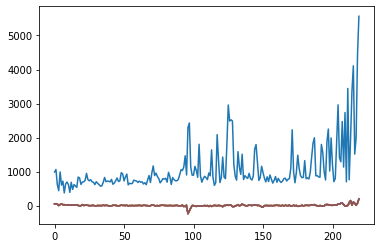

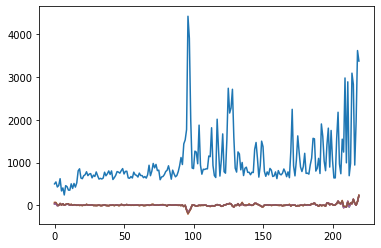

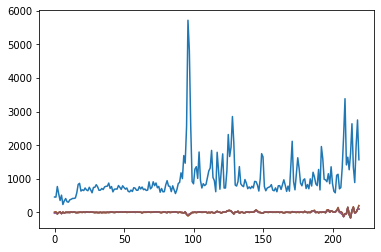

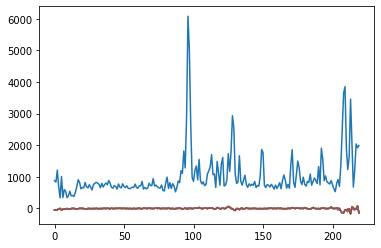

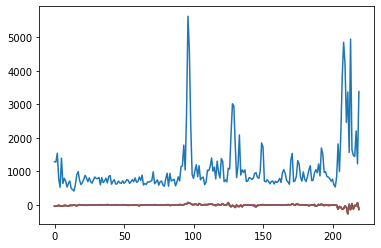

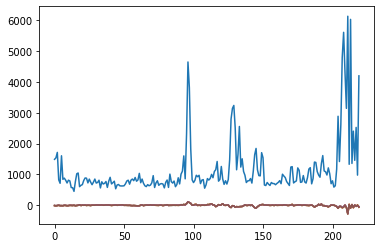

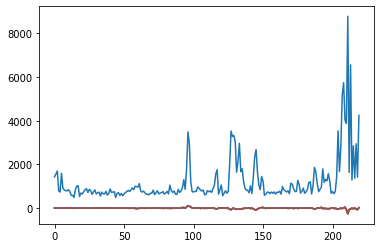

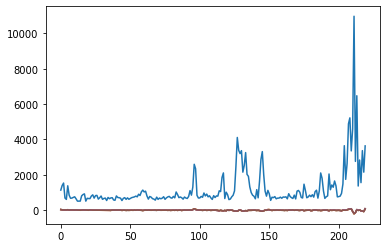

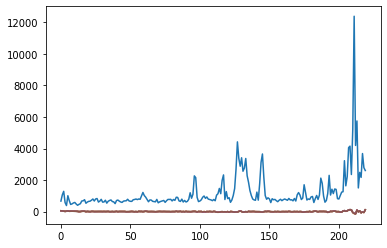

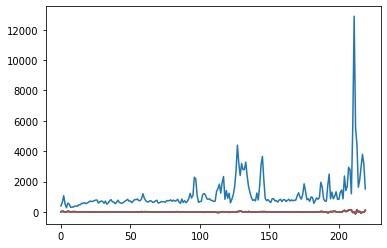

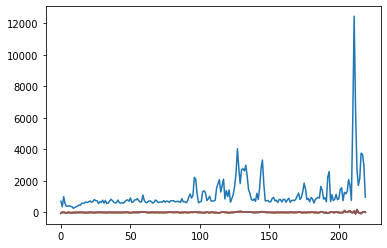

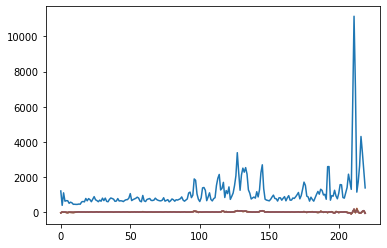

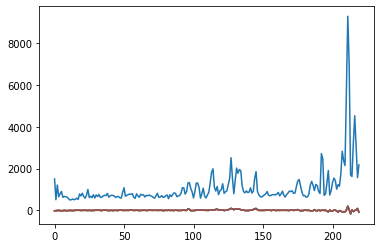

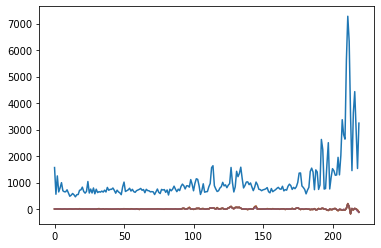

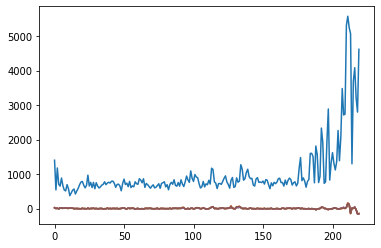

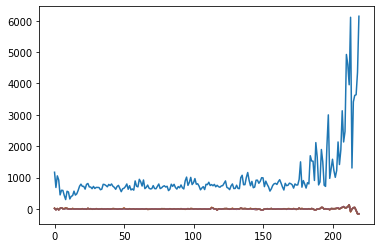

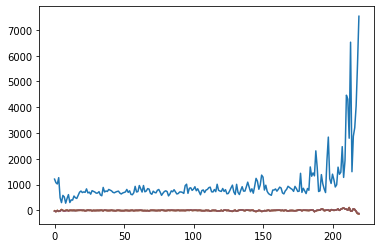

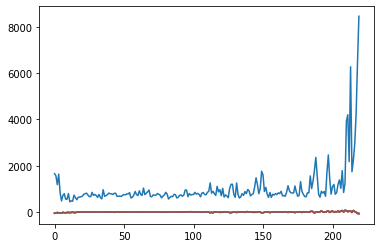

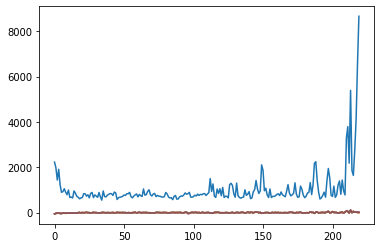

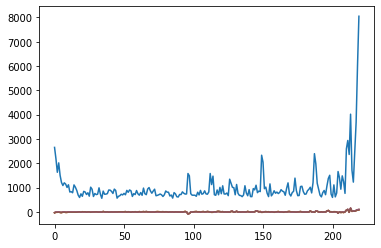

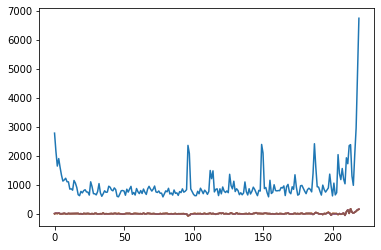

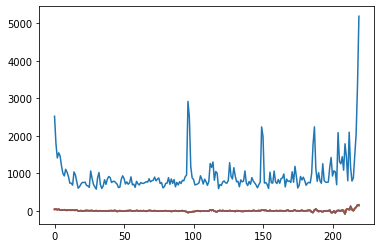

[]


In [ ]:
# fft_dop = [np.fft.fft(doppler[:,x:x+17]) for x in range(0,64,16)]
pos = []
for x in range(0,255,5):
    ang = np.fft.fft(rad[:,x:x+6]).real
    plt.plot(ang)
    plt.show()
    if np.amax(ang) > 20000:
        pos.append([np.unravel_index(np.argmax(ang), ang.shape)[0],x])
print(pos)

In [ ]:
def comb(arr):
    d = {}

    for row in arr:
        # check if the first element of the row is already in the dictionary
        if row[0] in d:
            # if it is, add the second element of the row to the list of values
            d[row[0]].append(row[1])
        else:
            # if it's not, create a new list with the second element as its only value
            d[row[0]] = [row[1]]

    # create a list of the averaged values for each key in the dictionary
    result = [[k, sum(v) / len(v)] for k, v in d.items()]

    return result # output: [[1, 3.0], [2, 3.0]]

ang = comb(pos)
print(ang)

[[96, 110.0], [211, 190.0]]


In [ ]:
print(doppler.shape)

(256, 64)


In [ ]:
posa = []

for x in range(0,64,4):
    ang = np.fft.fft(doppler[:,x:x+10]).real
    # plt.plot(ang)
    # plt.show()
    if np.amax(ang) > 400:
        posa.append([np.unravel_index(np.argmax(ang), ang.shape)[0]-5])
print(posa)

[[96], [96], [96]]


In [ ]:
def fix(arr):
    result = []
    for elem in arr:
        if elem not in result:
            result.append(elem)
    return result
print(fix(posa))
print(ang)
result = [elem for elem in ang if elem[0] in fix(posa)]
print(result[0]*50/256,result[1]*180/256-90)

[[96]]
[[110.917794    -3.2688035    0.92353793  -3.2688035 ]
 [115.20992171  -6.29657403  -0.40208015  -6.29657403]
 [117.24208132  -6.63629033   4.75417853  -6.63629033]
 ...
 [121.95970278  -1.20018972   1.24393219  -1.20018972]
 [111.89079958   0.31362781   1.11795709   0.31362781]
 [ 97.89533117  -0.74720566   1.2378664   -0.74720566]]


IndexError: list index out of range